In [1]:
import numpy as np # linear algebra
import pandas as pd 

course_df = pd.read_csv("/kaggle/input/1000course/top_1000_courses.csv")
course_df

,course_order
0,936971
1,696994
2,676932
3,697791
4,883345
...,...
995,1352884
996,696905
997,854870
998,707054


In [2]:
import pandas as pd

# Danh sách các file cần gộp, với file đầu tiên là 'user_data.csv' và các file tiếp theo là 'user_data_2.csv' đến 'user_data_10.csv'
file_paths = ['/kaggle/input/label2/user_data.csv'] + [f'/kaggle/input/label2/user_data_{i}.csv' for i in range(2, 11)]

# Đọc và kết hợp dữ liệu từ tất cả các file
df_list = [pd.read_csv(file_path)[['Course_ID', 'avg_score_course']] for file_path in file_paths]

# Gộp tất cả các DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Loại bỏ các dòng trùng lặp
df_combined = df_combined.drop_duplicates()

# Hiển thị kết quả
df_combined.head()

# Lưu kết quả gộp vào file mới nếu cần
output_path = '/kaggle/working/labeled_1_course.csv'
df_combined.to_csv(output_path, index=False)

In [3]:
df_combined

,Course_ID,avg_score_course
0,680963,2.161166
1,2033958,2.058446
2,694149,2.168276
3,697293,2.144274
10,696994,2.387187
...,...,...
31407260,1909583,1.976322
31412396,1955101,2.075710
31412478,605971,2.075710
31412484,2338329,2.075710


In [4]:
import pandas as pd

# Giả sử bạn đã có hai DataFrame: course_df và df_combined

# Loại bỏ các giá trị trùng lặp trong course_df (nếu có)
course_df = course_df.drop_duplicates(subset=['course_order'])

# Lấy danh sách 1000 khóa học đầu tiên từ course_df
course_ids = course_df['course_order'].head(1000).tolist()

# Làm tròn giá trị avg_score_course trong df_combined tới 0 chữ số thập phân
#df_combined['avg_score_course'] = df_combined['avg_score_course'].round(0)

# Lọc những dòng dữ liệu có 'Course_ID' nằm trong danh sách 'course_ids' từ 'course_df'
df_combined = df_combined[df_combined['Course_ID'].isin(course_ids)]

# Loại bỏ các dòng trùng lặp trong df_combined theo cột 'Course_ID'
df_combined = df_combined.drop_duplicates(subset=['Course_ID'])

# Lưu kết quả vào file CSV
output_path = '/kaggle/working/labeled_1_course(2).csv'
df_combined.to_csv(output_path, index=False)

# Hiển thị DataFrame kết quả
df_combined

,Course_ID,avg_score_course
0,680963,2.161166
2,694149,2.168276
3,697293,2.144274
10,696994,2.387187
11,697791,2.119940
...,...,...
2778467,1789696,2.516867
2778494,936968,1.749756
2778533,2221551,1.836317
2778534,2199450,1.836340


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


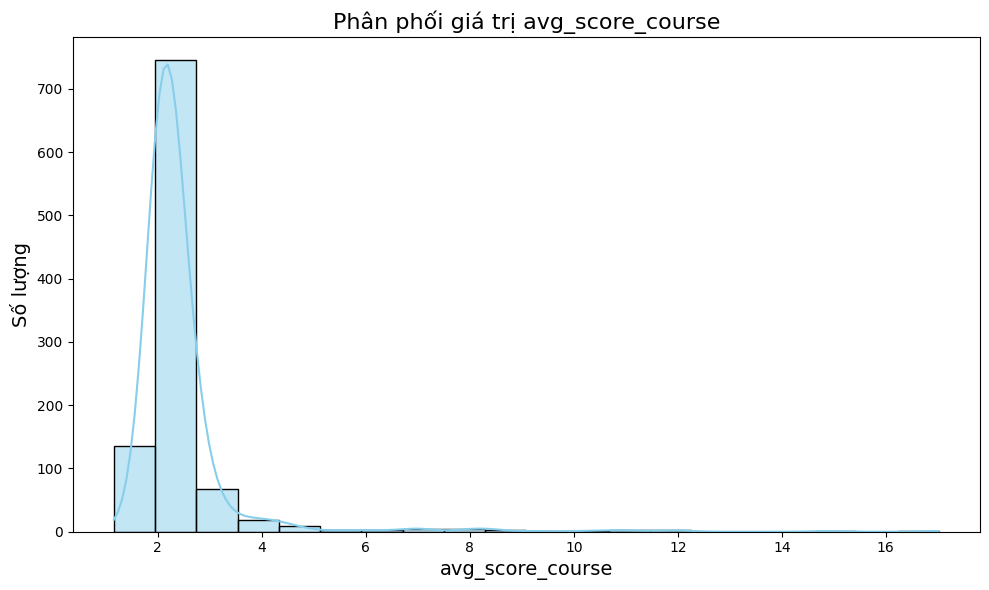

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame df_combined

# Vẽ biểu đồ phân phối của avg_score_course
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['avg_score_course'], bins=20, kde=True, color='skyblue')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Phân phối giá trị avg_score_course', fontsize=16)
plt.xlabel('avg_score_course', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Biểu đồ phân phối nhãn TC1

In [6]:
import pandas as pd

# Giả sử bạn đã có DataFrame df_combined

# Gán nhãn cho cột 'avg_score_course' dựa trên các điều kiện
def assign_label(score):
    if score < 1:
        return 1
    elif 1 <= score < 2:
        return 2
    elif 2 <= score < 3:
        return 3
    elif 3 <= score < 4:
        return 4
    else:
        return 5

# Áp dụng hàm để tạo cột 'label' mới
df_combined['avg_score_course'] = df_combined['avg_score_course'].apply(assign_label)

# Lưu kết quả vào file CSV (nếu cần)
output_path = '/kaggle/working/labeled_1_course_with_labels.csv'
df_combined.to_csv(output_path, index=False)

In [7]:
# Hiển thị kquả
df_combined

,Course_ID,avg_score_course
0,680963,3
2,694149,3
3,697293,3
10,696994,3
11,697791,3
...,...,...
2778467,1789696,3
2778494,936968,2
2778533,2221551,2
2778534,2199450,2


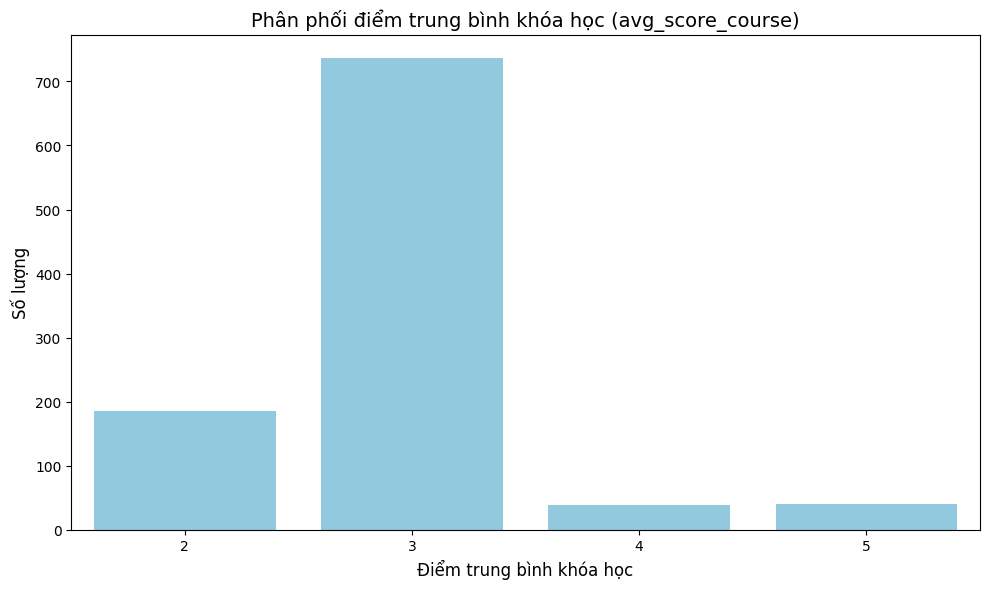

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame df_combined

# Vẽ biểu đồ cột (barplot) cho cột avg_score_course
plt.figure(figsize=(10, 6))
sns.countplot(x='avg_score_course', data=df_combined, color='skyblue')

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân phối điểm trung bình khóa học (avg_score_course)', fontsize=14)
plt.xlabel('Điểm trung bình khóa học', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()